In [1]:
### Make notebook wider:

from IPython.display import display, HTML

display(HTML(data="""
<style>
    div#notebook-container    { width: 95%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 99%; }
</style>
"""))

In [2]:
from Utilities.preprocessing import *

In [3]:
import os
from scipy.signal import lfilter
import pandas as pd
import numpy as np
import os, importlib
import matplotlib.pyplot as plt
import pickle
import scipy.io
import pickle
from tqdm.notebook import tqdm
from tqdm import tqdm
import re
# import ffmpeg
# import pandas as pd
# import numpy as np
# import matplotlib
# import matplotlib.pyplot as plt
# import matplotlib.patches as mpatches
# import math
# import statistics
# from scipy import stats
# from matplotlib import gridspec
# from matplotlib import colors
# import scipy
# from scipy.signal import find_peaks


%matplotlib inline  

In [4]:
def process_camera_data(TimeStampPath):

    #Load camera timestamps:
    Camera_ts_raw = load_camera_timestamps(TimeStampPath)
    #Convert to seconds and uncycle:
    Camera_ts = convert_uncycle_Timestamps(Camera_ts_raw)

    #check for dropped frames:
    check_timestamps(Camera_ts, Frame_rate = 60)
    # Find triggers:
    Camera_trig_states = find_trigger_states(Camera_ts_raw)
    #check if triggers are working:
    result = np.max(Camera_trig_states) == np.min(Camera_trig_states)
    
    #pull out video name
    video_name = [TimeStampPath.split("\\")[-1].split(".")[0] + '-camera-timestamp-data']

    if not result:

        # make camera dataframe:
        Camera_dataframe = pd.DataFrame(
            {'Time Stamps': Camera_ts,
            'Trigger State': Camera_trig_states,
            'DataPath': ([TimeStampPath] * len(Camera_ts))})
        
    return Camera_dataframe

def find_files(filename, search_path):
    result = []

    #Walking top-down from the root
    for root, dir, files in os.walk(search_path):
        if filename in files:
            result.append(os.path.join(root, filename))

    return result

def sequence_contains_sequence(haystack_seq, needle_seq, string):
    start_index = []
    for i in range(0, len(haystack_seq) - len(needle_seq) + 1):
        if needle_seq == haystack_seq[i:i+len(needle_seq)]:
            start_index = start_index + [i]
            print(string + ' barcode found')
    return start_index

def find_folder_path(parent_folder, target_folder):
    for root, dirs, files in os.walk(parent_folder):
        if target_folder in dirs:
            return os.path.join(root, target_folder)
        # If the target folder is not found
    return (print('not found'))

Set paths and load in data:

In [5]:
## 238

# video_path = r"Z:\projects\sequence_squad\data\video_data\raw_flycap\EJT238\131222"
# global_ts_path = r"Z:\projects\sequence_squad\data\kilosort_output\EJT238\Recording6\Processed_data_2_L50" 
# raw_data_directory = r"Z:\projects\sequence_squad\data\raw_neuropixel\OE_DATA\EJT238\131222\2022-12-13_13-37-49"



# video_path = r"Z:\projects\sequence_squad\data\video_data\raw_flycap\EJT136\101121"
# global_ts_path = r"Z:\projects\sequence_squad\data\kilosort_output\EJT136\Recording2\2021-11-10_14-09-43\Processed_data" 
# raw_data_directory = r"Z:\projects\sequence_squad\data\raw_neuropixel\OE_DATA\EJT136\Recording2\2021-11-10_14-09-43"


# video_path = r"Z:\projects\sequence_squad\data\video_data\raw_flycap\EJT136\111121"
# global_ts_path = r"Z:\projects\sequence_squad\data\kilosort_output\EJT136\Recording3\Processed_data" 
# raw_data_directory = r"Z:\projects\sequence_squad\data\raw_neuropixel\OE_DATA\EJT136\Recording3\2021-11-11_14-18-10"


# video_path = r"Z:\projects\sequence_squad\data\video_data\raw_flycap\EJT136\121121"
# global_ts_path = r"Z:\projects\sequence_squad\data\kilosort_output\EJT136\Recording4\2021-11-12_15-50-19\Processed_data" 
# raw_data_directory = r"Z:\projects\sequence_squad\data\raw_neuropixel\OE_DATA\EJT136\Recording4\2021-11-12_15-50-19"

## 148

# video_path = r"Z:\projects\sequence_squad\data\video_data\raw_flycap\EJT48_implant2\191022\split_video"
# global_ts_path = r"Z:\projects\sequence_squad\data\kilosort_output\EJT149_implant2\Recording1\Processed_data" 
# raw_data_directory = r"Z:\projects\sequence_squad\data\raw_neuropixel\OE_DATA\EJT149_implant2\fixed"



### 149

# video_path = r"Z:\projects\sequence_squad\data\video_data\raw_flycap\EJT149_implant2\301121"
# global_ts_path = r"Z:\projects\sequence_squad\data\kilosort_output\EJT149_implant2\Recording1\Processed_data" 
# raw_data_directory = r"Z:\projects\sequence_squad\data\raw_neuropixel\OE_DATA\EJT149_implant2\fixed"

# video_path = r"Z:\projects\sequence_squad\data\video_data\raw_flycap\EJT149\161121"
# global_ts_path = r"Z:\projects\sequence_squad\data\kilosort_output\EJT149\Recording1\2021-11-16_12-06-37\Processed_data" 
# raw_data_directory = r"Z:\projects\sequence_squad\data\raw_neuropixel\OE_DATA\EJT149\Recording1\2021-11-16_12-06-37"

# video_path = r"Z:\projects\sequence_squad\data\video_data\raw_flycap\EJT149\171121"
# global_ts_path = r"Z:\projects\sequence_squad\data\kilosort_output\EJT149\Recording2\2021-11-17_13-32-03\Processed_data" 
# raw_data_directory = r"Z:\projects\sequence_squad\data\raw_neuropixel\OE_DATA\EJT149\Recording2\2021-11-17_13-32-03"

# video_path = r"Z:\projects\sequence_squad\data\video_data\raw_flycap\EJT149\181121"
# global_ts_path = r"Z:\projects\sequence_squad\data\kilosort_output\EJT149\Recording3\2021-11-18_14-14-13\Processed_data" 
# raw_data_directory = r"Z:\projects\sequence_squad\data\raw_neuropixel\OE_DATA\EJT149\Recording3\2021-11-18_14-14-13"

# -------------------------------------------------- above all done

# 178
# video_path = r"Z:\projects\sequence_squad\data\video_data\raw_flycap\EJT178\150322"
# global_ts_path = r"Z:\projects\sequence_squad\data\kilosort_output\EJT178\Recording1\2022-03-15_13-55-36\Processed_data" 
# raw_data_directory = r"Z:\projects\sequence_squad\data\raw_neuropixel\OE_DATA\EJT178\150321\2022-03-15_13-55-36"

# video_path = r"Z:\projects\sequence_squad\data\video_data\raw_flycap\EJT178\160322"
# global_ts_path = r"Z:\projects\sequence_squad\data\kilosort_output\EJT178\Recording2\2022-03-16_14-33-57\Processed_data" 
# raw_data_directory = r"Z:\projects\sequence_squad\data\raw_neuropixel\OE_DATA\EJT178\160321\2022-03-16_14-33-57"

# video_path = r"Z:\projects\sequence_squad\data\video_data\raw_flycap\EJT178\170322"
# global_ts_path = r"Z:\projects\sequence_squad\data\kilosort_output\EJT178\Recording3\2022-03-17_15-54-10\Processed_data" 
# raw_data_directory = r"Z:\projects\sequence_squad\data\raw_neuropixel\OE_DATA\EJT178\170321\2022-03-17_15-54-10"

# video_path = r"Z:\projects\sequence_squad\data\video_data\raw_flycap\EJT178\180322"
# global_ts_path = r"Z:\projects\sequence_squad\data\kilosort_output\EJT178\Recording4\2022-03-18_14-03-30\Processed_data" 
# raw_data_directory = r"Z:\projects\sequence_squad\data\raw_neuropixel\OE_DATA\EJT178\180321\2022-03-18_14-03-30"

# video_path = r"Z:\projects\sequence_squad\data\video_data\raw_flycap\EJT178\210322"
# global_ts_path = r"Z:\projects\sequence_squad\data\kilosort_output\EJT178\Recording5\2022-03-21_14-56-37\Processed_data" 
# raw_data_directory = r"Z:\projects\sequence_squad\data\raw_neuropixel\OE_DATA\EJT178\210322\2022-03-21_14-56-37"

# video_path = r"Z:\projects\sequence_squad\data\video_data\raw_flycap\EJT178\290322"
# global_ts_path = r"Z:\projects\sequence_squad\data\kilosort_output\EJT178\Recording6\2022-03-29_13-55-06\Processed_data" 
# raw_data_directory = r"Z:\projects\sequence_squad\data\raw_neuropixel\OE_DATA\EJT178\290322\2022-03-29_13-55-06"

# video_path = r"Z:\projects\sequence_squad\data\video_data\raw_flycap\EJT178\300322"
# global_ts_path = r"Z:\projects\sequence_squad\data\kilosort_output\EJT178\Recording7\Processed_data" 
# raw_data_directory = r"Z:\projects\sequence_squad\data\raw_neuropixel\OE_DATA\EJT178\300322\2022-03-30_13-48-39"

# video_path = r"Z:\projects\sequence_squad\data\video_data\raw_flycap\EJT178\310322"
# global_ts_path = r"Z:\projects\sequence_squad\data\kilosort_output\EJT178\Recording8\Processed_data" 
# raw_data_directory = r"Z:\projects\sequence_squad\data\raw_neuropixel\OE_DATA\EJT178\310322\2022-03-31_12-53-12"

# video_path = r"Z:\projects\sequence_squad\data\video_data\raw_flycap\EJT178\010422"
# global_ts_path = r"Z:\projects\sequence_squad\data\kilosort_output\EJT178\Recording9\Processed_data" 
# raw_data_directory = r"Z:\projects\sequence_squad\data\raw_neuropixel\OE_DATA\EJT178\010422\2022-04-01_13-28-38"


# ## 162
# video_path = r"Z:\projects\sequence_squad\data\video_data\raw_flycap\EJT162\240322"
# global_ts_path = r"Z:\projects\sequence_squad\data\kilosort_output\EJT162\Recording3\2022-03-24_14-18-38\Processed_data" 
# raw_data_directory = r"Z:\projects\sequence_squad\data\raw_neuropixel\OE_DATA\EJT162\240322\2022-03-24_14-18-38"


## 178_implant2
# video_path = r"Z:\projects\sequence_squad\data\video_data\raw_flycap\EJT178_implant2\040422"
# global_ts_path = r"Z:\projects\sequence_squad\data\kilosort_output\EJT178_implant2\Recording1\2022-04-04_13-19-11\Processed_data" 
# raw_data_directory = r"Z:\projects\sequence_squad\data\raw_neuropixel\OE_DATA\EJT178_implant2\040422\2022-04-04_13-19-11"

# video_path = r"Z:\projects\sequence_squad\data\video_data\raw_flycap\EJT178_implant2\050422"
# global_ts_path = r"Z:\projects\sequence_squad\data\kilosort_output\EJT178_implant2\Recording2\2022-04-05_12-29-57\Processed_data" 
# raw_data_directory = r"Z:\projects\sequence_squad\data\raw_neuropixel\OE_DATA\EJT178_implant2\050422\2022-04-05_12-29-57"

# video_path = r"Z:\projects\sequence_squad\data\video_data\raw_flycap\EJT178_implant2\060422"
# global_ts_path = r"Z:\projects\sequence_squad\data\kilosort_output\EJT178_implant2\Recording3\2022-04-06_11-49-30\Processed_data" 
# raw_data_directory = r"Z:\projects\sequence_squad\data\raw_neuropixel\OE_DATA\EJT178_implant2\060422\2022-04-06_11-49-30"

# video_path = r"Z:\projects\sequence_squad\data\video_data\raw_flycap\EJT178_implant2\070422"
# global_ts_path = r"Z:\projects\sequence_squad\data\kilosort_output\EJT178_implant2\Recording4\2022-04-07_12-39-27\Processed_data" 
# raw_data_directory = r"Z:\projects\sequence_squad\data\raw_neuropixel\OE_DATA\EJT178_implant2\070422\2022-04-07_12-39-27"


 
    

In [122]:
MIR = 'EJT262_1_5'
date = '220523'

global_ts_path = r"Z:\projects\sequence_squad\data\kilosort_output\\"
animal = MIR.split('_')[0]
Rnum = MIR.split('_')[-1]
global_ts_path = global_ts_path + animal +'\Recording' + Rnum + '\Processed_data\\'
print(global_ts_path)

video_path = r"Z:\projects\sequence_squad\data\video_data\raw_flycap\\" + animal + '\\' + date 
print(video_path)

## load in relevant data:
PATH1 = r"Z:\projects\sequence_squad\data\raw_neuropixel\OE_DATA\\"
full_path = PATH1 + animal + '\\'+ date
raw_data_directory =  full_path + '\\' + os.listdir(full_path)[0] + '\\'
OE_processor_path = find_folder_path(raw_data_directory, "continuous") 
raw_data_directory = OE_processor_path[0:-11]
print(raw_data_directory)
        

Z:\projects\sequence_squad\data\kilosort_output\\EJT262\Recording5\Processed_data\
Z:\projects\sequence_squad\data\video_data\raw_flycap\\EJT262\220523
Z:\projects\sequence_squad\data\raw_neuropixel\OE_DATA\\EJT262\220523\2023-05-22_09-57-01\Record Node 113\experiment1\recording1


In [123]:
## Extract EPhys timestamp data:


global_ts_path_ = global_ts_path + "\\global-timstamps_event-df.pkl"

with open(global_ts_path_, 'rb') as f:
    events_df = pickle.load(f)
    
print(os.listdir(video_path + '//1_presleep'))
print('------------------------------------------------------------------------------------------------------------------------------------')
print(os.listdir(video_path + '//3_postsleep'))

['above_2023-05-22T10_00_20.avi', 'above_2023-05-22T10_00_20.csv', 'camera1_2023-05-22T10_00_20.avi', 'camera1_2023-05-22T10_00_20.csv', 'camera3_2023-05-22T10_00_20.avi', 'camera3_2023-05-22T10_00_20.csv']
------------------------------------------------------------------------------------------------------------------------------------
['above_2023-05-22T12_26_59.avi', 'above_2023-05-22T12_26_59.csv', 'camera1_2023-05-22T12_26_59.avi', 'camera1_2023-05-22T12_26_59.csv', 'camera3_2023-05-22T12_26_59.avi', 'camera3_2023-05-22T12_26_59.csv']


In [124]:
events_df

,line,sample_number,timestamp,processor_id,stream_index,stream_name,state,global_timestamp
0,1,41539734,1384.645850,120,0,ProbeA-AP,1,1384.657800
1,1,3461644,1384.645880,120,1,ProbeA-LFP,1,1384.657800
2,1,41548373,1384.646000,119,2,PXIe-6341,1,1384.657800
3,1,3462894,1385.145928,120,1,ProbeA-LFP,0,1385.157800
4,1,41563375,1385.146067,119,2,PXIe-6341,0,1385.157819
...,...,...,...,...,...,...,...,...
125042,1,54520873,21810.299852,120,1,ProbeA-LFP,0,21808.349400
125043,1,654250483,21810.299900,120,0,ProbeA-AP,0,21808.349433
125044,1,654265482,21810.795655,120,0,ProbeA-AP,1,21808.849400
125045,1,654332952,21810.797213,119,2,PXIe-6341,1,21808.849400


In [125]:
#sample rate:
Fs = 30000.0

#extract processors: 
# processor_unique_indexes = np.unique(events_df['processor_id'],return_index=True)[1]
# processor = [events_df['processor_id'][index] for index in sorted(processor_unique_indexes)]
streams = events_df.stream_name.unique()
for stream in streams:
    if 'PXIe' in stream:
        NIDAQ_stream = stream
    if 'LFP' in stream:
        LFP_stream = stream
    if 'AP' in stream:
        AP_stream = stream

# seperate by processor:
grouped = events_df.groupby(events_df.stream_name)
NP_clock_Spikes = grouped.get_group(AP_stream)
NP_clock_LFP = grouped.get_group(LFP_stream)
NIDAQ_TTLS = grouped.get_group(NIDAQ_stream)

grouped = NIDAQ_TTLS.groupby(events_df.line)
Bpod_NIDAQ_TTLS = grouped.get_group(2)

### sort out offset:
### sort out offset:
sync_messages_path = find_files("sync_messages.txt",raw_data_directory)[0]
sync = open(sync_messages_path, 'r')
lines = sync.readlines()
for line in lines:
    if 'Neuropix-PXI' in line:
        if 'ProbeA-AP' in line:
            print(line)
            start_time_offset = int(re.findall(r'\d+', line)[-1]) / Fs
            print(start_time_offset)

Start Time for Neuropix-PXI (120) - ProbeA-AP @ 30000 Hz: 41527932

1384.2644


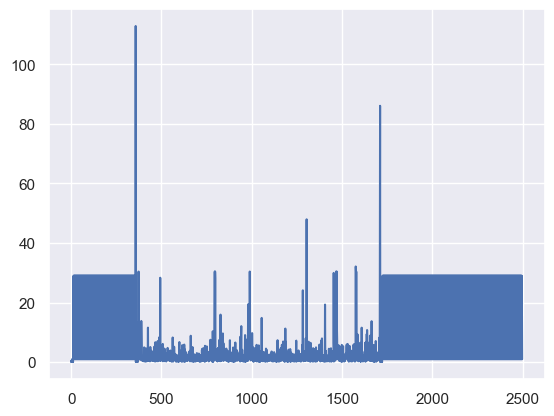

In [126]:
plt.plot(np.diff(Bpod_NIDAQ_TTLS['global_timestamp']))

In [127]:
print('START TIME OFFSET IS ...')
print(start_time_offset)

START TIME OFFSET IS ...
1384.2644


In [128]:

Behaviour_barcode = np.array([0.05, 1.  , 0.05, 0.5 , 0.05, 1.  , 0.05, 0.5 , 0.05, 0.5 , 0.05]) #LSLSSS (last gap cant be seen as no pulse after it...)
Clock_barcode = np.array([0.05, 1.  , 0.05, 0.5 , 0.05, 1.  , 0.05, 0.5 , 0.05, 1.0 , 0.05]) # LSLSLS
presleep_barcode = np.array([0.05, 0.5  , 0.05, 0.5 , 0.05, 1.  , 0.05, 0.5 , 0.05, 0.5 , 0.05]) # SSLSSS
postsleep_barcode = np.array([0.05, 1.  , 0.05, 0.5 , 0.05, 0.5  , 0.05, 0.5 , 0.05, 0.5 , 0.05]) # LSSSSS

## find barcode indicies: 

behaviour_barcode_index = sequence_contains_sequence(list(np.round(np.diff(Bpod_NIDAQ_TTLS['global_timestamp']),3)),list(Behaviour_barcode), 'behaviour')
clock_barcode_index = sequence_contains_sequence(list(np.round(np.diff(Bpod_NIDAQ_TTLS['global_timestamp']),3)),list(Clock_barcode), 'clock')
presleep_barcode_index = sequence_contains_sequence(list(np.round(np.diff(Bpod_NIDAQ_TTLS['global_timestamp']),3)),list(presleep_barcode), 'presleep')
postsleep_barcode_index = sequence_contains_sequence(list(np.round(np.diff(Bpod_NIDAQ_TTLS['global_timestamp']),3)),list(postsleep_barcode), 'postsleep')

presleep_index = presleep_barcode_index[0]
behav_index = behaviour_barcode_index[0]
postsleep_index = behaviour_barcode_index[-1]
# clock_index = clock_barcode_index[0]

behaviour barcode found
behaviour barcode found
presleep barcode found


In [130]:
#### load in camera data

for file in os.listdir(video_path + '//1_presleep'):
    if '.csv' in file:
        if 'above' in file:
            print(file)
            pre_sleep_file = file
            break
        else:
            print('help')


for file in os.listdir(video_path + '//3_postsleep'):
    if '.csv' in file:
        if 'above' in file:
            print(file)
            post_sleep_file = file
            break
        else:
            print('help')


pre_sleep_df = pd.read_csv(video_path + '\\1_presleep\\' + pre_sleep_file)
post_sleep_df = pd.read_csv(video_path + '\\3_postsleep\\' + post_sleep_file)
    

above_2023-05-22T10_00_20.csv
above_2023-05-22T12_26_59.csv


Frames dropped = 0
Frames dropped = 0


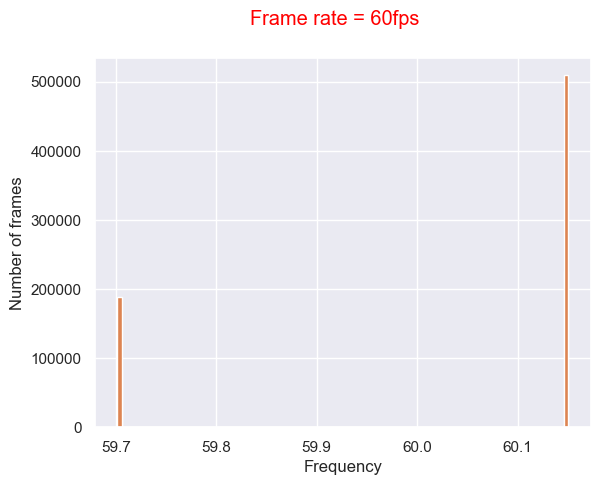

In [131]:
### slow, run once

pre_sleep_df = process_camera_data(video_path + '\\1_presleep\\' + pre_sleep_file)
post_sleep_df = process_camera_data(video_path + '\\3_postsleep\\' + post_sleep_file)

# Presleep

In [132]:
# align ephys and camera timestamps
# create dataframe with thw two aligned 
# Camera_timestamps(at triggers), camera time at triggers, camera times, ephys times 

blue x should be at uptick
red should be a downtick


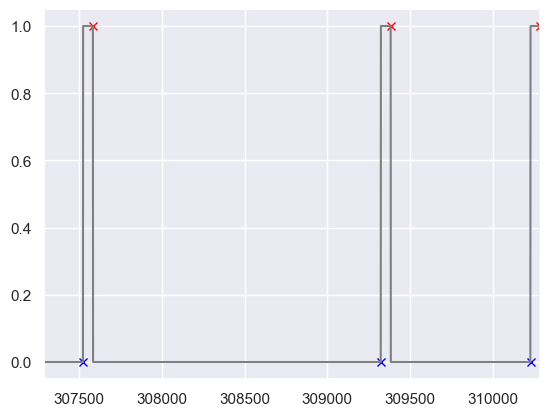

In [133]:
### BACK find camera triggers: 

Camera_trig_states = pre_sleep_df['Trigger State'].values

where_ttl_changes = list(np.where(np.roll(Camera_trig_states,1)!=Camera_trig_states)[0])
if where_ttl_changes[0] == 0:
    where_ttl_changes = where_ttl_changes[1::]
down_tick = np.array(where_ttl_changes[1::2])
up_tick = np.array(where_ttl_changes[0::2])

## check this is correct:
plt.plot(down_tick,np.ones(len(down_tick)),'x', color = 'red')
plt.plot(up_tick,np.zeros(len(up_tick)),'x',color = 'blue')
plt.plot(Camera_trig_states, color = 'grey')
plt.xlim([max(where_ttl_changes)-3000, max(where_ttl_changes)])

print('blue x should be at uptick')
print('red should be a downtick') 


### set ts variables:
cam_trigger_times = pre_sleep_df['Time Stamps'][where_ttl_changes].values
ephys_ts = Bpod_NIDAQ_TTLS['global_timestamp'][presleep_index + len(presleep_barcode):behav_index].values



(0.0, 20.0)

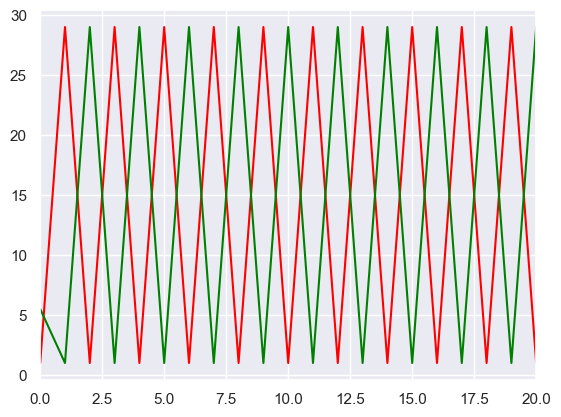

In [134]:
plt.plot(np.diff(cam_trigger_times), color = 'red')
plt.plot(np.diff(ephys_ts),color = 'green')
plt.xlim([0, 20])

In [135]:
### shift by 1?
### set ts variables:
cam_trigger_times = pre_sleep_df['Time Stamps'][where_ttl_changes].values
ephys_ts = Bpod_NIDAQ_TTLS['global_timestamp'][presleep_index + len(presleep_barcode)+1:behav_index].values

In [85]:
# cam_trigger_times = cam_trigger_times[0:128]

(120.0, 140.0)

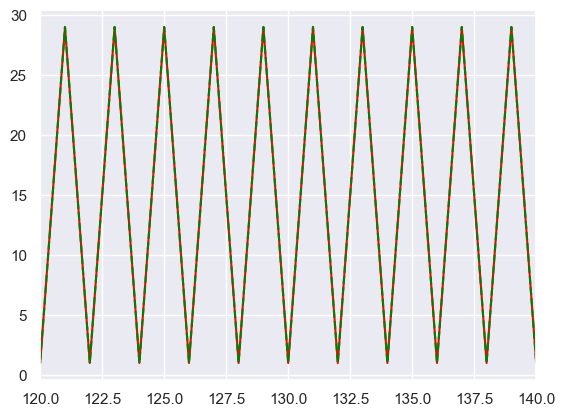

In [136]:
plt.plot(np.diff(cam_trigger_times), color = 'red')
plt.plot(np.diff(ephys_ts),'--', color = 'green')
plt.xlim([120, 140])

(-0.5, 0.5)

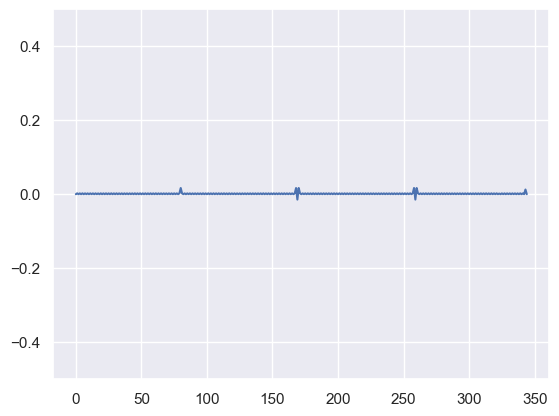

In [137]:
plt.plot(np.diff(cam_trigger_times) - np.diff(ephys_ts))
plt.ylim([-.5, 0.5])

In [138]:
camera_times_s = pre_sleep_df['Time Stamps']

pre_sleep_df['Camera_time_raw'] = camera_times_s

nan_array = np.array([np.nan]*len(pre_sleep_df['Time Stamps'].values))
nan_array[np.array(where_ttl_changes)] = cam_trigger_times
aligned_trigger_times = nan_array

nan_array_2 = np.array([np.nan]*len(pre_sleep_df['Time Stamps'].values))
nan_array_2[np.array(where_ttl_changes)] = ephys_ts
aligned_trigger_times_ephys = nan_array_2



pre_sleep_df['Camera_trigger_times'] = aligned_trigger_times
pre_sleep_df['Ephys_trigger_times'] = (aligned_trigger_times_ephys -start_time_offset)

In [139]:
### align camer time to ephys 

offset_ephys_times = ephys_ts - start_time_offset

aligned_time = []
count = 0
for index in tqdm(range(len(camera_times_s))):
    if count < len(where_ttl_changes): # no TTL at the end so just count forwards instead of backwards here
        if index < where_ttl_changes[count]:
            diff = cam_trigger_times[count] - camera_times_s[index]
            aligned_time = aligned_time + [offset_ephys_times[count] - diff]
            if diff < 0:
                print('error!')
        else:
            aligned_time = aligned_time + [offset_ephys_times[count]]
            count = count + 1
    else:
        diff = camera_times_s[index] - cam_trigger_times[count-1] # time minus last trigger time 
        aligned_time = aligned_time + [offset_ephys_times[count-1] + diff] ## add the difference to the last ephys trigger
        if diff < 0:
            print('error!')
            
pre_sleep_df['Camera_time_Ephys_Aligned'] = aligned_time

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 310321/310321 [08:36<00:00, 600.44it/s]


In [140]:
end_offset = aligned_time[-1] - camera_times_s.values[-1]
start_offset =aligned_time[0]
print('ephys starts at:                ' +  str(start_offset))
print('aligned end differecne is:      ' +  str(end_offset))
print('difference is                   ' +  str(start_offset - end_offset ))

ephys starts at:                6.7288573772599385
aligned end differecne is:      6.457445326852394
difference is                   0.27141205040754457


In [141]:
pre_sleep_df

,Time Stamps,Trigger State,DataPath,Camera_time_raw,Camera_trigger_times,Ephys_trigger_times,Camera_time_Ephys_Aligned
0,0.000000,0.0,Z:\projects\sequence_squad\data\video_data\raw...,0.000000,NaN,NaN,6.728857
1,0.016750,0.0,Z:\projects\sequence_squad\data\video_data\raw...,0.016750,NaN,NaN,6.745607
2,0.033375,0.0,Z:\projects\sequence_squad\data\video_data\raw...,0.033375,NaN,NaN,6.762232
3,0.050000,0.0,Z:\projects\sequence_squad\data\video_data\raw...,0.050000,NaN,NaN,6.778857
4,0.066625,0.0,Z:\projects\sequence_squad\data\video_data\raw...,0.066625,NaN,NaN,6.795482
...,...,...,...,...,...,...,...
310316,5169.481750,0.0,Z:\projects\sequence_squad\data\video_data\raw...,5169.481750,NaN,NaN,5175.939195
310317,5169.498375,0.0,Z:\projects\sequence_squad\data\video_data\raw...,5169.498375,NaN,NaN,5175.955820
310318,5169.515125,0.0,Z:\projects\sequence_squad\data\video_data\raw...,5169.515125,NaN,NaN,5175.972570
310319,5169.531750,0.0,Z:\projects\sequence_squad\data\video_data\raw...,5169.531750,NaN,NaN,5175.989195


In [144]:
### chang ethis if needed (eg. clock or not 2_task issue )

out_path = r"Z:\projects\sequence_squad\organised_data\animals\\" +  animal + '_implant' + MIR.split('_')[1] + '\\'
for file in os.listdir(out_path):
    if 'recording' + Rnum == file.split('_')[0]:
        print(file)
        out_path = out_path + file 
out_path = out_path + r'\behav_sync\\1_pre_sleep\\'
print(out_path)

recording5_22-05-2023
Z:\projects\sequence_squad\organised_data\animals\\EJT262_implant1\recording5_22-05-2023\behav_sync\\1_pre_sleep\\


In [145]:
#### Save it out:
pre_sleep_df.to_csv(out_path +'/Presleep_Ephys_Camera_sync.csv')

print('data checked?')
print('data Saved')

data checked?
data Saved


# Postsleep

blue x should be at uptick
red should be a downtick


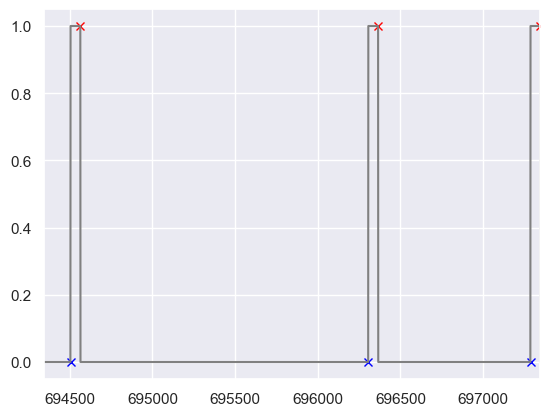

In [146]:
### BACK find camera triggers: 

Camera_trig_states = post_sleep_df['Trigger State'].values

where_ttl_changes = list(np.where(np.roll(Camera_trig_states,1)!=Camera_trig_states)[0])
if where_ttl_changes[0] == 0:
    where_ttl_changes = where_ttl_changes[1::]
down_tick = np.array(where_ttl_changes[1::2])
up_tick = np.array(where_ttl_changes[0::2])

## check this is correct:
plt.plot(down_tick,np.ones(len(down_tick)),'x', color = 'red')
plt.plot(up_tick,np.zeros(len(up_tick)),'x',color = 'blue')
plt.plot(Camera_trig_states, color = 'grey')
plt.xlim([max(where_ttl_changes)-3000, max(where_ttl_changes)])

print('blue x should be at uptick')
print('red should be a downtick') 


### set ts variables:
cam_trigger_times = post_sleep_df['Time Stamps'][where_ttl_changes].values
ephys_ts = Bpod_NIDAQ_TTLS['global_timestamp'][postsleep_index + len(postsleep_barcode)::].values



(0.0, 20.0)

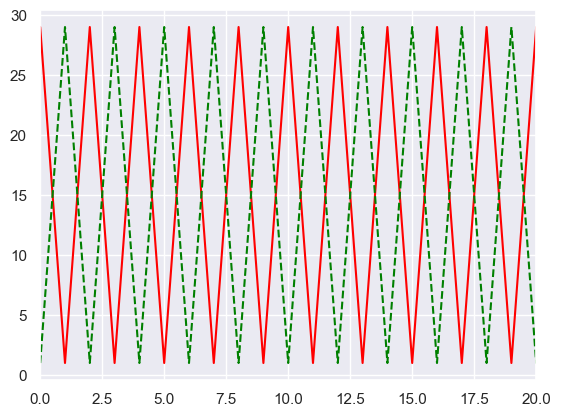

In [147]:
plt.plot(np.diff(cam_trigger_times[5::]), color = 'red')
plt.plot(np.diff(ephys_ts[1::]),'--',color = 'green')
plt.xlim([0, 20])

In [152]:
### shift by 1?
### set ts variables:
cam_trigger_times = post_sleep_df['Time Stamps'][where_ttl_changes].values
ephys_ts = Bpod_NIDAQ_TTLS['global_timestamp'][postsleep_index + len(postsleep_barcode)+1::].values

# if clock
# ephys_ts = Bpod_NIDAQ_TTLS['global_timestamp'][postsleep_index + len(postsleep_barcode)+1:clock_barcode_index[0]].values


(0.0, 20.0)

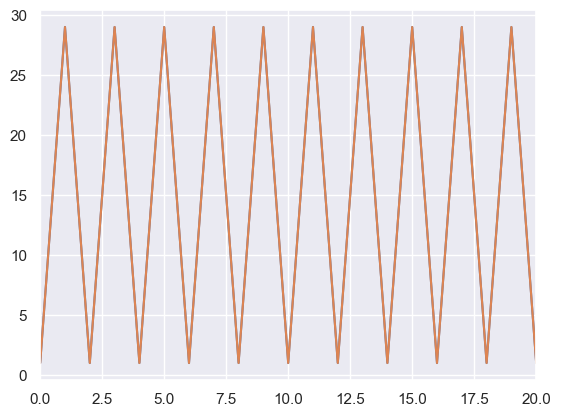

In [153]:
plt.plot(np.diff(cam_trigger_times))
plt.plot(np.diff(ephys_ts))
plt.xlim([0, 20])

(-0.5, 0.5)

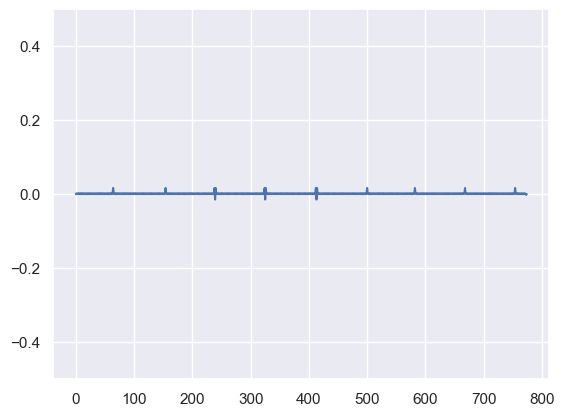

In [154]:
plt.plot(np.diff(cam_trigger_times) - np.diff(ephys_ts))
plt.ylim([-.5, 0.5])

In [155]:
# where_ttl_changes = where_ttl_changes[0:-2]

camera_times_s = post_sleep_df['Time Stamps']

post_sleep_df['Camera_time_raw'] = camera_times_s

nan_array = np.array([np.nan]*len(post_sleep_df['Time Stamps'].values))
nan_array[np.array(where_ttl_changes)] = cam_trigger_times
aligned_trigger_times = nan_array

nan_array_2 = np.array([np.nan]*len(post_sleep_df['Time Stamps'].values))
nan_array_2[np.array(where_ttl_changes)] = ephys_ts
aligned_trigger_times_ephys = nan_array_2



post_sleep_df['Camera_trigger_times'] = aligned_trigger_times
post_sleep_df['Ephys_trigger_times'] = (aligned_trigger_times_ephys -start_time_offset)

In [156]:
### align camer time to ephys 

offset_ephys_times = ephys_ts - start_time_offset

aligned_time = []
count = 0

for index in tqdm(range(len(camera_times_s))):
    if count < len(where_ttl_changes): # no TTL at the end so just count forwards instead of backwards here
        if index < where_ttl_changes[count]:
            diff = cam_trigger_times[count] - camera_times_s[index]
            aligned_time = aligned_time + [offset_ephys_times[count] - diff]
            if diff < 0:
                print('error!')
        else:
            aligned_time = aligned_time + [offset_ephys_times[count]]
            count = count + 1
    else:
        diff = camera_times_s[index] - cam_trigger_times[count-1] # time minus last trigger time 
        aligned_time = aligned_time + [offset_ephys_times[count-1] + diff] ## add the difference to the last ephys trigger
        if diff < 0:
            print('error!')
            
post_sleep_df['Camera_time_Ephys_Aligned'] = aligned_time

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 697406/697406 [48:49<00:00, 238.07it/s]


In [157]:
end_offset = aligned_time[-1] - camera_times_s.values[-1]
start_offset =aligned_time[0]
print('ephys starts at:                ' +  str(start_offset))
print('aligned end differecne is:      ' +  str(end_offset))
print('difference is                   ' +  str(start_offset - end_offset ))

ephys starts at:                8804.62204130963
aligned end differecne is:      8804.00431665976
difference is                   0.6177246498700697


In [158]:
### chang ethis if needed (eg. clock or not 2_task issue )

out_path = r"Z:\projects\sequence_squad\organised_data\animals\\" +  animal + '_implant' + MIR.split('_')[1] + '\\'
for file in os.listdir(out_path):
    if 'recording' + Rnum == file.split('_')[0]:
        print(file)
        out_path = out_path + file 
out_path = out_path + r'\behav_sync\\3_post_sleep\\'
print(out_path)

recording5_22-05-2023
Z:\projects\sequence_squad\organised_data\animals\\EJT262_implant1\recording5_22-05-2023\behav_sync\\3_post_sleep\\


In [159]:
#### Save it out:
post_sleep_df.to_csv(out_path +'/Postsleep_Ephys_Camera_sync.csv')

print('data checked?')
print('data Saved')

data checked?
data Saved
